In [12]:
from sklearn import tree
from IPython.display import Image
import pydotplus

### sckit-learn的API应用

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#加载数据集
iris=load_iris()
iris.keys()
#dict_keys(['target', 'DESCR', 'data', 'target_names', 'feature_names'])
n_samples,n_features=iris.data.shape
print("Number of sample:",n_samples)
#Number of sample: 150
print("Number of feature",n_features)
#Number of feature 4
#第一个样例
print(iris.data[0])
#[ 5.1 3.5 1.4 0.2]
print(iris.data.shape)
#(150, 4)
print(iris.target.shape)
#(150,)
print(iris.target)

Number of sample: 150
Number of feature 4
[5.1 3.5 1.4 0.2]
(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


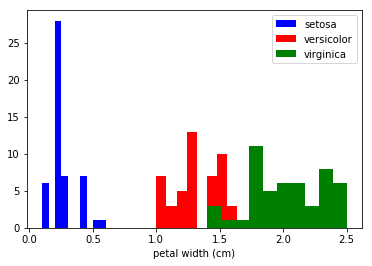

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=datasets.load_iris()
x_index=3
color=['blue','red','green']
for label,color in zip(range(len(iris.target_names)),color):
    plt.hist(iris.data[iris.target==label,x_index],label=iris.target_names[label],color=color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

### sklearn的数据验证

(1797, 64)


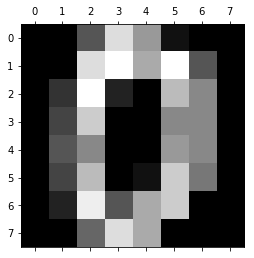

In [15]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
digits=load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

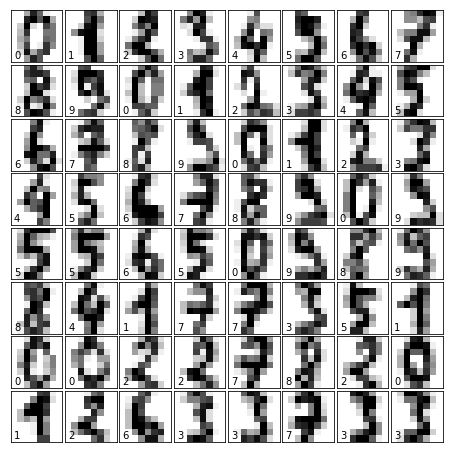

(1797, 64)
(1797, 64)
(1797, 8, 8)
True


In [9]:
digits=load_digits()
digits.keys()
n_samples,n_features=digits.data.shape
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
#绘制数字：每张图像8*8像素点
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')#用目标值标记图像
    ax.text(0,7,str(digits.target[i]))
plt.show()
print((n_samples,n_features))
print(digits.data.shape)
print(digits.images.shape)
print(np.all(digits.images.reshape((1797,64))==digits.data))

### 综合实例


In [21]:
# 导入需要的模块
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  #控制油面画色模块
#from sklearn.model_selection import train_test_split #废弃！！
from sklearn.cross_validation import train_test_split#随机划分训练集和测试集
from sklearn.preprocessing import StandardScaler  #导入特征工程
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import BernoulliRBM  ##伯努利尔姆模块
from sklearn.neighbors import KNeighborsClassifier  #K最近邻算法
from sklearn.svm import SVC  #支持向量机中的svc奇异值分解
from sklearn.gaussian_process import GaussianProcess  #高斯过程回归过程
from sklearn.tree import DecisionTreeClassifier  #决策树
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier#随即森林，ADboost模块
from sklearn.naive_bayes import GaussianNB #高斯模型
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #QDA二次判别

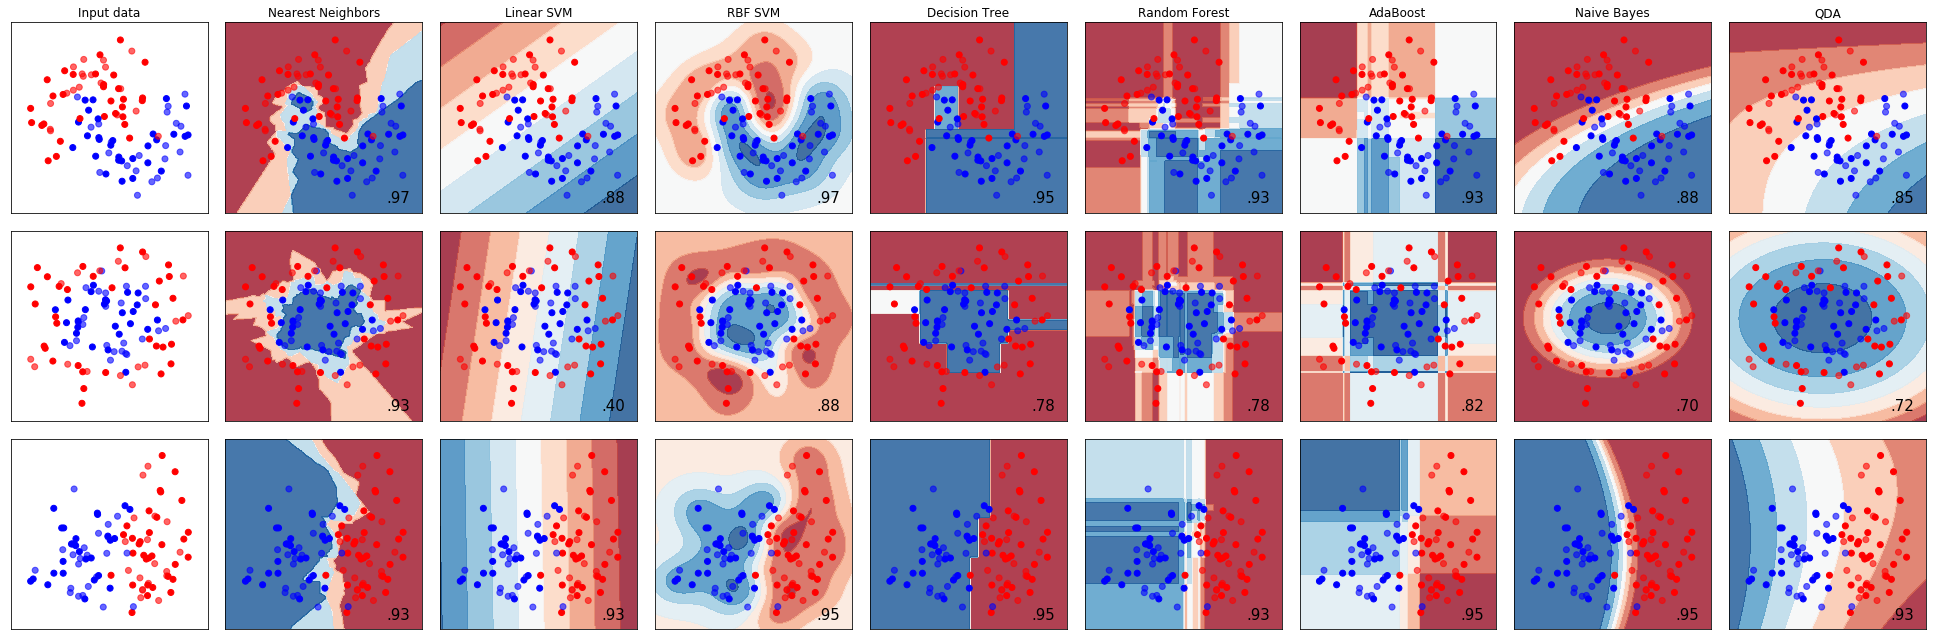

In [22]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA", "Gaussian Process","Neural Net", ]

classifiers = [  #各类模型的列表
    KNeighborsClassifier(3),  #分支树
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),#最大深度
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    #GaussianProcess(),
    #BernoulliRBM(),
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# 遍历整个数据列表
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 首先绘制数据集
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # 画出没和训练模型的比分
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    #遍历每个算法列表
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # 绘制决策边界。 为此，我们将为每个分配颜色
        # 指向网格[x_min，m_max] x [y_min，y_max]。
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # 将结果放入颜色画板中
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # 显示训练的准确度
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # 用线性画出他的图形
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),#右下角显示他的准确度
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()